# PSEi Returns: Random Forest Regression


## Create some syntehtic data using scikit-learn's built-in regression generator

### Import libraries

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

### Make a data frame and create basic visualizations

#### Data Frame

In [9]:
df_testing_raw = pd.read_csv('Base 2 Back Testing 2.csv')
df_training_raw = pd.read_csv('Base 2 Training 2.csv')

df_training = df_training_raw.dropna()
df_testing = df_testing_raw.dropna()

X_training = df_training.iloc[:,5:]
X_test = df_testing.iloc[:,5:]

y_training = df_training.iloc[:,3]
y_test = df_testing.iloc[:,3]

#### Scatter plots

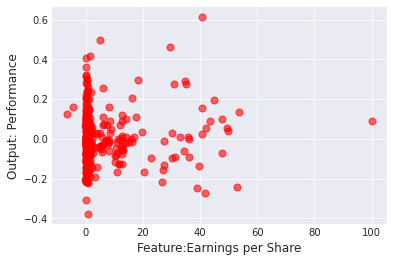

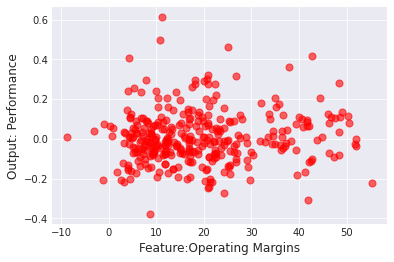

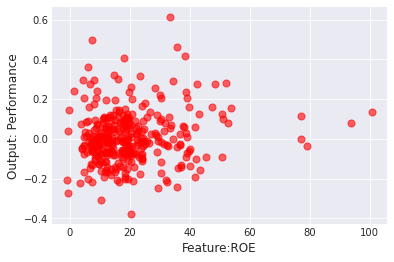

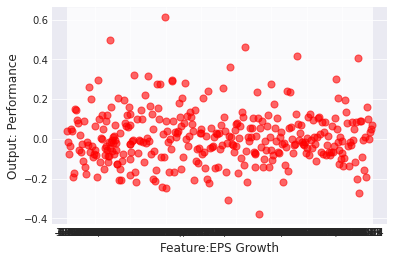

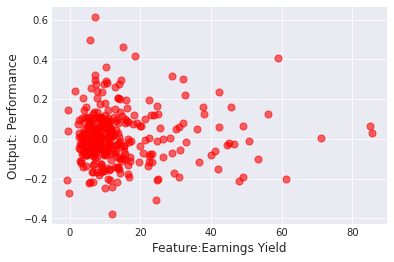

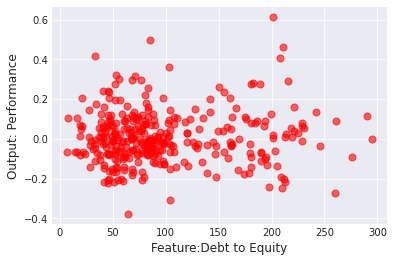

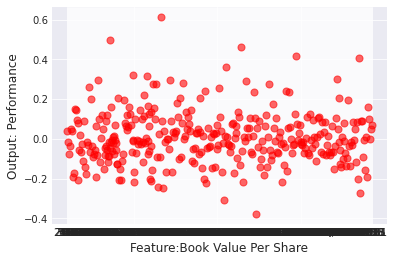

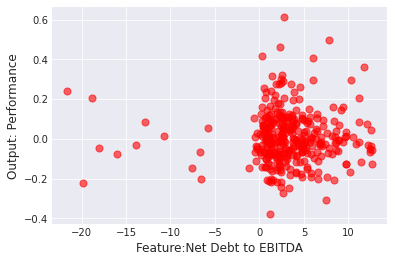

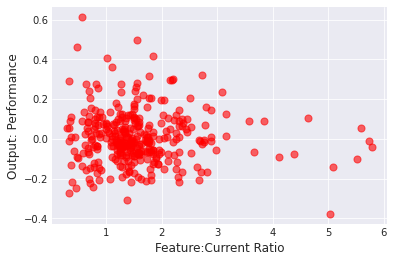

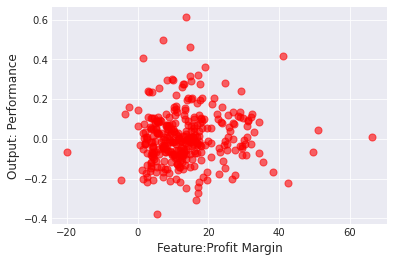

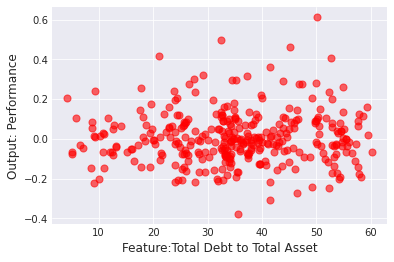

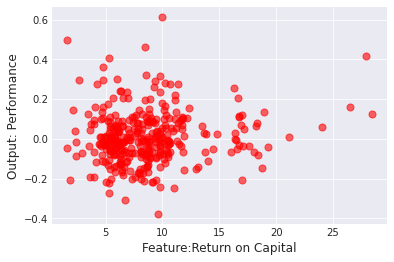

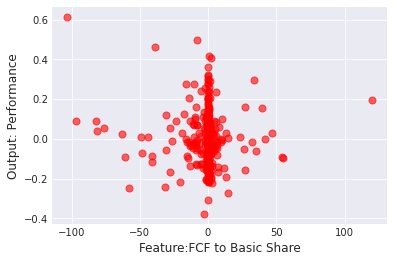

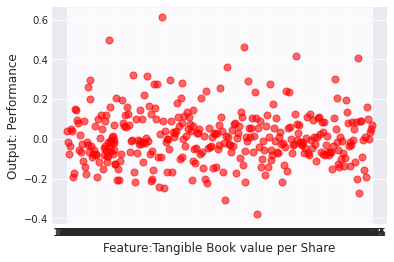

In [85]:
with plt.style.context(('seaborn-dark')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: Performance',fontsize=12)
        plt.scatter(df[col],df['Performance'],c='red',s=50,alpha=0.6)

#### It is clear from the scatter plots that some of the features influence the output while the others don't. This is the result of choosing a particular *n_informative* in the *make_regression* method

#### Histograms of the feature space

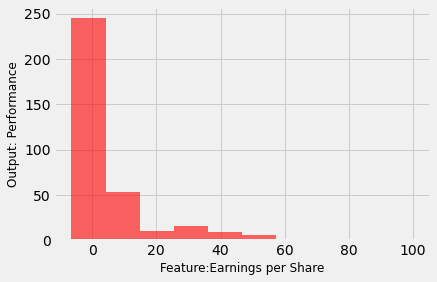

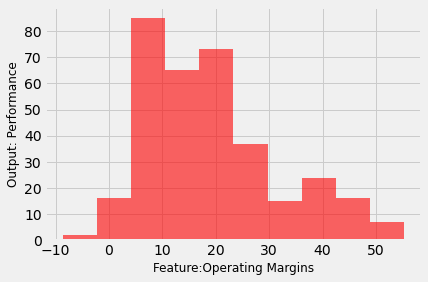

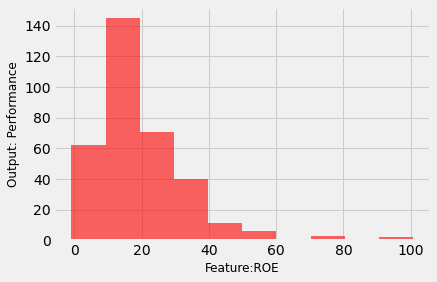

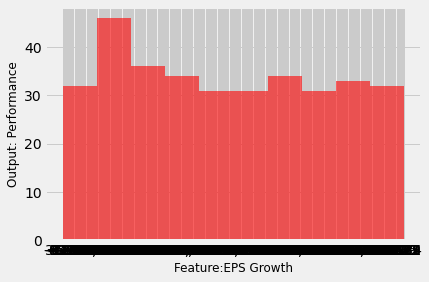

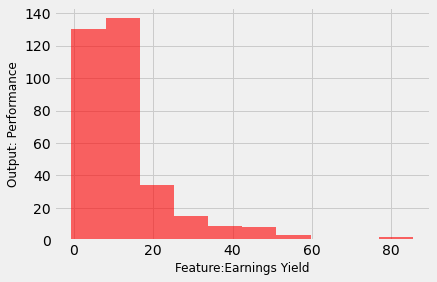

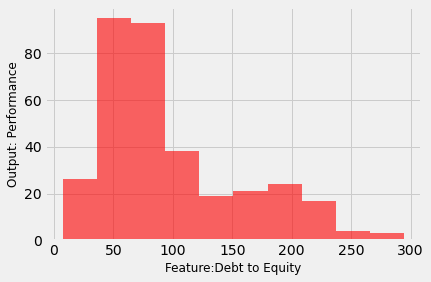

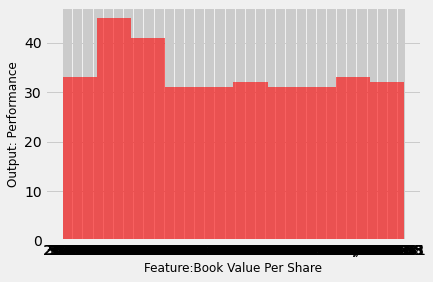

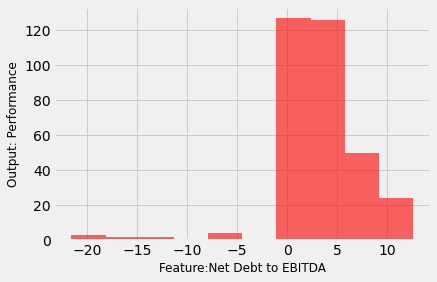

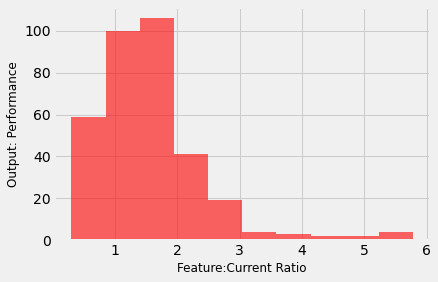

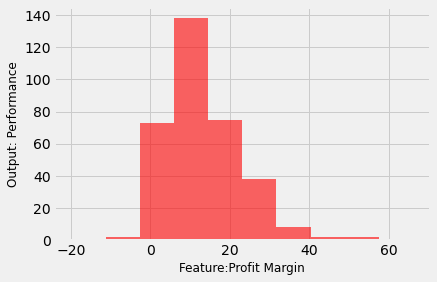

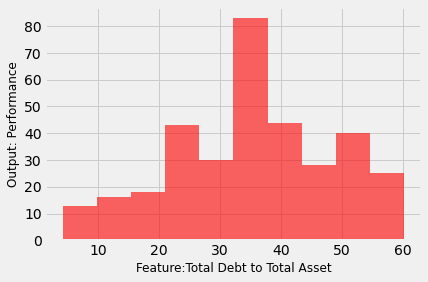

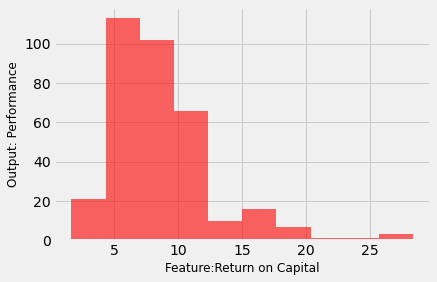

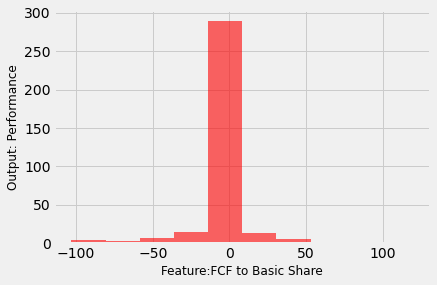

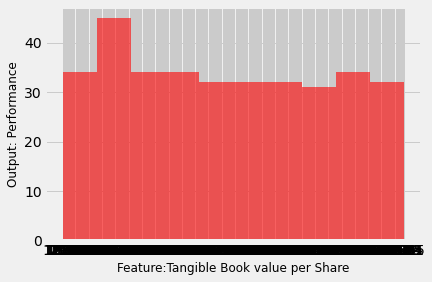

In [86]:
with plt.style.context(('fivethirtyeight')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: Performance',fontsize=12)
        plt.hist(df[col],alpha=0.6,facecolor='r')

## How will a Decision Tree regressor do?

Every run will generate different result but on most occassions, **the single decision tree regressor is likely to learn spurious features** i.e. will assign small importance to features which are not true regressors.

In [10]:
from sklearn import tree

In [15]:
tree_model = tree.DecisionTreeRegressor(max_depth=5,random_state=None)
tree_model.fit(X_training,y_training)

DecisionTreeRegressor(max_depth=5)

Relative importance of the features:  [0.         0.08828123 0.         0.09108834 0.         0.
 0.         0.         0.         0.         0.17936042 0.
 0.         0.         0.         0.03982093 0.31168762 0.28920525
 0.00055623]


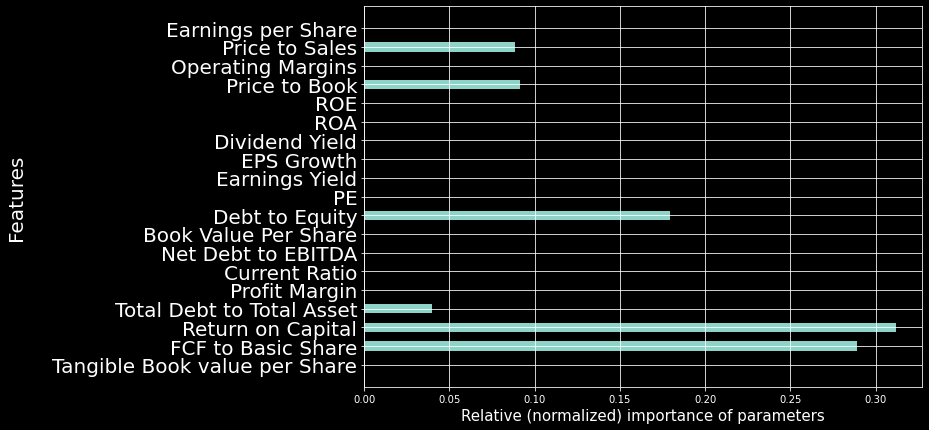

In [16]:
n_features =19

print("Relative importance of the features: ",tree_model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features,0,-1),X_training.columns,fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features,0,-1),width=tree_model.feature_importances_,height=0.5)

#### Print the $R^2$ score of the Decision Tree regression model

Even though the $R^2$ score is pretty high, the model is slightly flawed because it has assigned importance to regressors which have no true significance.

In [17]:
print("Regression coefficient:",tree_model.score(X_test,y_test))

Regression coefficient: -0.6509243142910919


## Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
model = RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=100)
model.fit(X_training, y_training)

RandomForestRegressor(max_depth=5, max_leaf_nodes=5)

#### Print the relative importance of the features

Relative importance of the features:  [0.04219955 0.02797665 0.02716041 0.01122073 0.10582374 0.02383763
 0.04104953 0.0930291  0.01676027 0.02505293 0.02423848 0.01505356
 0.01290498 0.04826407 0.02459226 0.0070451  0.19082348 0.24452185
 0.01844568]


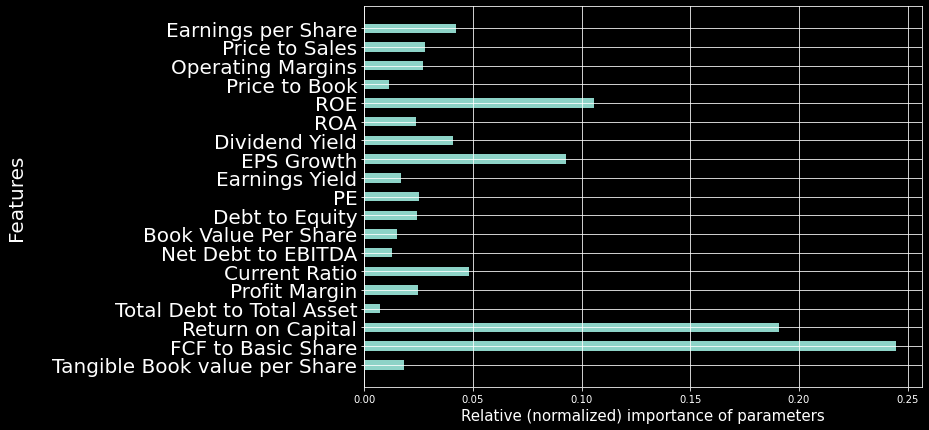

In [21]:
print("Relative importance of the features: ",model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),X_training.columns,fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=model.feature_importances_,height=0.5)

#### Print the $R^2$ score of the Random Forest regression model

In [22]:
print("Regression coefficient:",model.score(X_test,y_test))

Regression coefficient: -0.1753505318185018


## Benchmark to statsmodel (ordinary least-square solution by exact analytic method)

[Statsmodel is a Python module](http://www.statsmodels.org/dev/index.html) that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. 

In [23]:
import statsmodels.api as sm

In [24]:
Xs=sm.add_constant(X_training)
stat_model = sm.OLS(y_training,Xs)
stat_result = stat_model.fit()

In [25]:
print(stat_result.summary())

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.272
Date:                Wed, 21 Feb 2024   Prob (F-statistic):              0.201
Time:                        21:39:44   Log-Likelihood:                 190.75
No. Observations:                 285   AIC:                            -341.5
Df Residuals:                     265   BIC:                            -268.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

### Show the relative importance of regressors side by side

For Random Forest Model, show the relative importance of features as determined by the meta-estimator. For the OLS model, show normalized t-statistic values.

**It will be clear that although the RandomForest regressor identifies the important regressors correctly, it does not assign the same level of relative importance to them as done by OLS method t-statistic**

In [26]:
df_importance = pd.DataFrame(data=[model.feature_importances_,stat_result.tvalues[1:]/sum(stat_result.tvalues[1:])],
                             columns=X_training.columns,
                             index=['RF Regressor relative importance', 'OLS method normalized t-statistic'])
df_importance

,Earnings per Share,Price to Sales,Operating Margins,Price to Book,ROE,ROA,Dividend Yield,EPS Growth,Earnings Yield,PE,Debt to Equity,Book Value Per Share,Net Debt to EBITDA,Current Ratio,Profit Margin,Total Debt to Total Asset,Return on Capital,FCF to Basic Share,Tangible Book value per Share
RF Regressor relative importance,0.042200,0.027977,0.027160,0.011221,0.105824,0.023838,0.041050,0.093029,0.016760,0.025053,0.024238,0.015054,0.012905,0.048264,0.024592,0.007045,0.190823,0.244522,0.018446
OLS method normalized t-statistic,0.162753,-0.469969,0.374852,0.554791,-0.650202,0.449920,0.279577,-0.550944,0.354874,-0.256880,0.496183,-0.356898,-0.102361,0.483889,-0.170694,-0.431427,-0.106766,0.607777,0.331524
